This is the third step to do visualization. In this section, we will see: 
1. How many position number for each job category? 
2. Job location ?
3. Job type ?
4. Word Cloud for each job category ?
5. Extract the skills that need for each job category
6. Degree for data job ?

## Get data

In [9]:
#Import library:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import string
from wordcloud import WordCloud
import numpy as np

from nltk.corpus import stopwords
from sklearn.feature_extraction import text

In [3]:
data=pd.read_csv('Final_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1967 non-null   object
 1   Type         1967 non-null   object
 2   Location     1967 non-null   object
 3   Description  1967 non-null   object
 4   Link         1967 non-null   object
 5   Catergory    1967 non-null   object
dtypes: object(6)
memory usage: 92.3+ KB


## EDA

### Position number

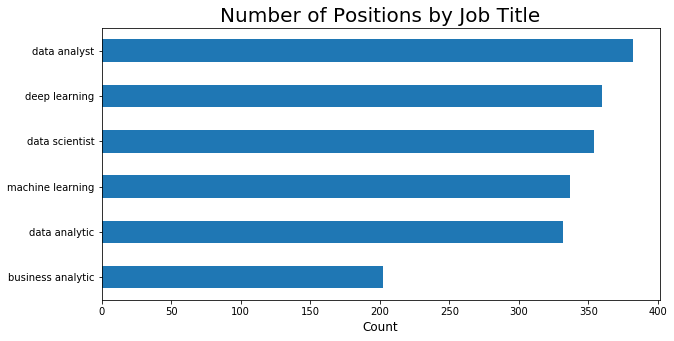

In [4]:
df=data.copy()
title = df.groupby(['Catergory']).count().sort_values('Type').tail(20)

title['Type'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Job Title', size = 20)
plt.show()

### Positions by location

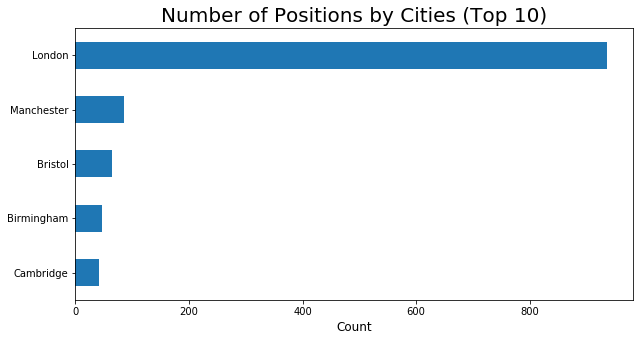

In [6]:
city = df.groupby(['Location']).count().sort_values('Title').tail(5)

city['Title'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Cities (Top 10)', size = 20)
plt.show()

### Position by job type

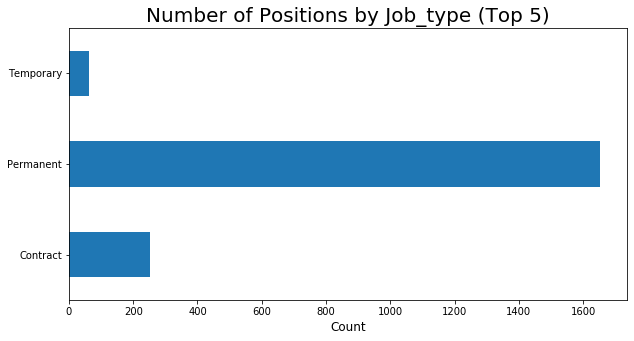

In [7]:
job_type=df[df['Type']!='Not found']
job_type = job_type.groupby(['Type']).count().sort_values('Type').tail(5)

job_type['Title'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Job_type (Top 5)', size = 20)
plt.show()

## Word Cloud

In [8]:
# Combine the desciptions & job_title 
data_text = pd.DataFrame(df, columns=['Catergory','Title','Description'])
data_text.head()

,Catergory,Title,Description
0,business analytic,Tableau and Business Intelligence Analytic Pla...,Tableau and Business Intelligence Analytic P...
1,business analytic,Tableau and Business Intelligence Analytic Pla...,The Commercial Analyst is directly responsib...
2,business analytic,Tableau Engineer,"Paid Social and Video Specialist, Leatherhea..."
3,business analytic,Tableau Engineer,"Title- BI Consultant , Location- South East/..."
4,business analytic,Business Intelligence Reporting Developer,You will follow the Critical Path of productio...


In [13]:
# Function to do wordcloud visualization
def visualization(job_name, job_title):
    item= data_text[data_text['Catergory'] == job_name]
    extra_stopword = ['br','amp','em','according to','FC','em','uf0b7','of','with','according to','related to','year','experience','to',"p'",
                 'Requirement','in','data','skills','ability','working','At-Least','development','advantage','of','knowledge','in',
                  'Understanding','At Least','Ability to','skill','the company','Other Benefits','You will','to','are','looking',
                 'the', 'the role','to join','You','will','this','is','analytics', 'Data Science','Data Scientist','xa0',
                 'Data Analyst','This is','this role','You will','The role','role','also']
    stop_words = set(stopwords.words('english')).union(extra_stopword)
    item_words = []
    wc = WordCloud(background_color='black',max_words=200,stopwords=stop_words,width=1600,height=800,max_font_size=200,collocations=False)
    for t in item['Description'].tolist():
        item_words+= t
    wc.generate(pd.Series(item_words).str.cat(sep = ''))

    plt.figure(figsize=(10,12))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(job_title, size = 20)
    plt.axis('off')
    plt.show()

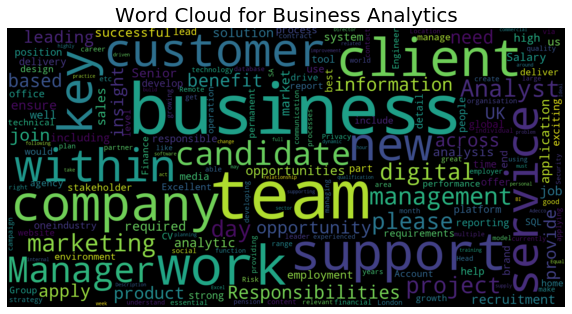

In [14]:
# Business Analyst
visualization("business analytic","Word Cloud for Business Analytics")

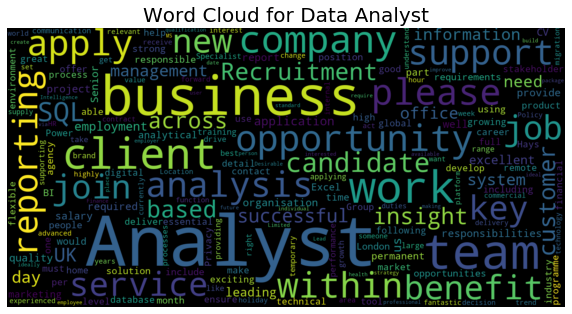

In [15]:
# Data Analyst
visualization("data analyst","Word Cloud for Data Analyst")

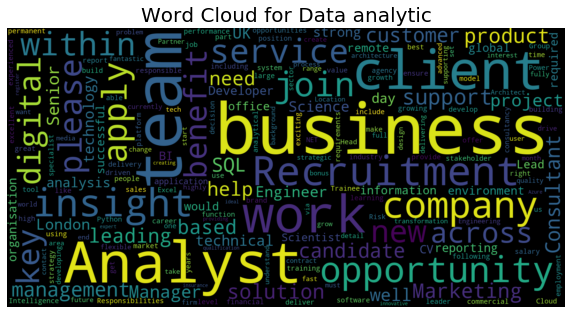

In [16]:
# Data analytic
visualization("data analytic","Word Cloud for Data analytic")

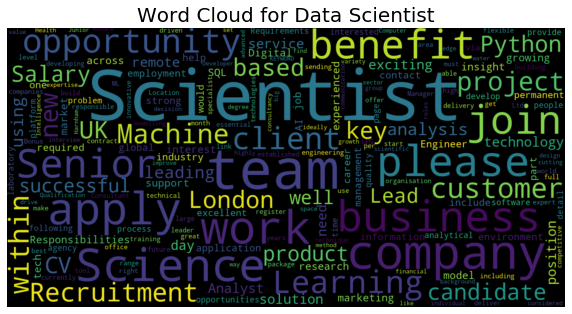

In [17]:
# Data Scientist
visualization("data scientist","Word Cloud for Data Scientist")

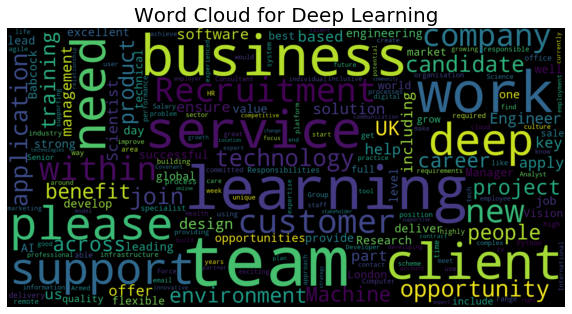

In [18]:
# Deep Learning
visualization("deep learning","Word Cloud for Deep Learning")

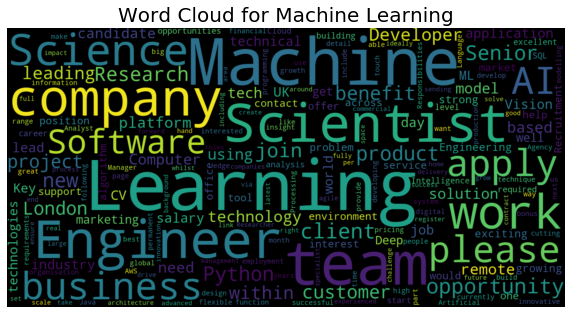

In [19]:
# Machine Learning
visualization("machine learning","Word Cloud for Machine Learning")

## Skill Requirement 

In [23]:
# Function to count text
def count_text(patt,it_skill):
    pattern = re.compile(patt)
    count = 0
    for t in it_skill:
        if pattern.search(t):
            count+=1
    return count

In [30]:
# Function to extract the skills 
def skill_requirements(job_name,job_title):
    skills = ['R','Python','Hadoop','SQL','Tableau','TensorFlow','Agile','Power BI','SSaS','Algorithm','Java','Visualization',
         'Excel','SPSS','SAS','AWS','NoSQL','Talend','Snowflake','Azure','Data Modelling','Scala','Data Architect','Hampshire',
         'Data Lake']

    skill_patt = ['\WR\W+\s*','(?i)\WPython\W','(?i)\WHadoop\W?','(?i)SQL\w*','(?i)\WTableau\W?',
              "(?i)\WTensorFlow\W?","(?i)\WAgile\W?","(?i)\WPower\s?BI\W?",
             "(?i)\WSSAS\W?","(?i)\WAlgorithms?\W?",'(?i)Java\w*','(?i)\WVisualization\W?','(?i)\WExcel\W',
             '(?i)\WSPSS\W','(?i)\WSAS\W','(?i)\WAWS\W','(?i)\WNoSQL\W','(?i)\WTalend\W','(?i)\WSnowflake\W','(?i)\WAzure\W',
             "(?i)\WData\s?Modelling\W?",'(?i)\WScala\W',"(?i)\WData\s?Architect\W?",'(?i)\WHampshire\W',"(?i)\WData\s?Lake\W?"]

    skill_df =pd.DataFrame({"skill": skills,"regex_pattern":skill_patt})
    
    job_skill =data_text[data_text['Catergory'] == job_name]['Description'].values
    
    i = []
    for x in skill_df['regex_pattern']:
        i.append(count_text(x,job_skill))
    skill_df['count'] = i
    skill_df['ptg'] = round(skill_df['count']/len(job_skill),2)
        
    x = skill_df.sort_values(by = 'ptg')
    ax =x['ptg'].plot(kind = "barh",figsize = (10,5))
    ax.set_title(job_title, size = 15)
    ax.set_yticklabels(x['skill'], size = 12)
    ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
    plt.show()

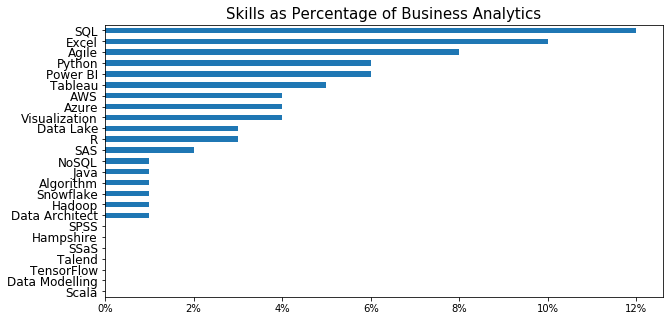

In [31]:
# Skill requirements for Business Analytics 
skill_requirements("business analytic","Skills as Percentage of Business Analytics")

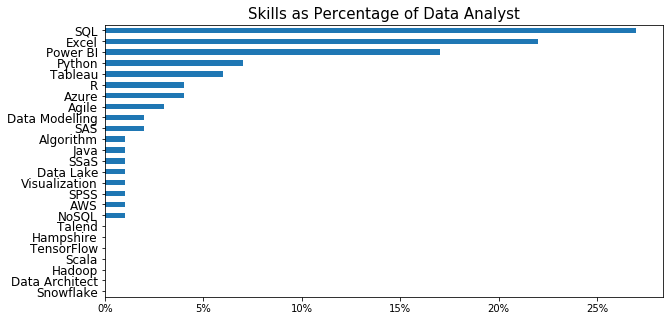

In [32]:
# Skill requirements for Data Analyst 
skill_requirements("data analyst","Skills as Percentage of Data Analyst")

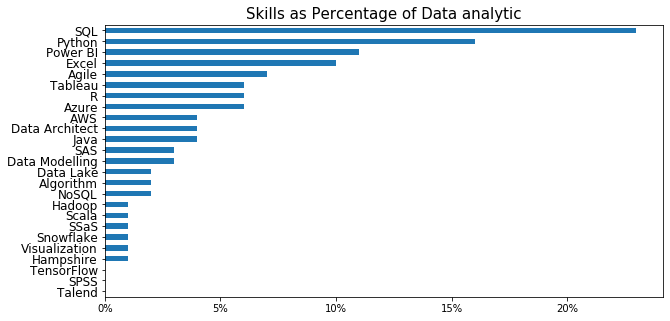

In [33]:
# Skill requirements for data analytic
skill_requirements("data analytic","Skills as Percentage of Data analytic")

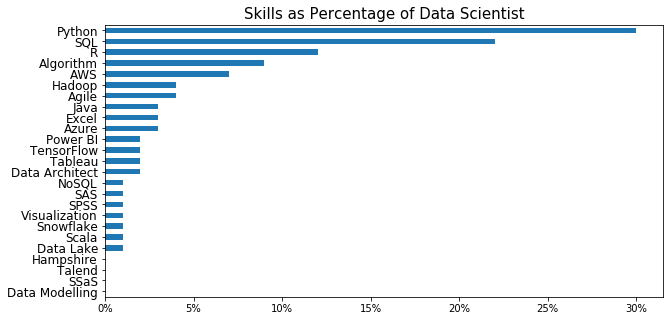

In [35]:
# Skill requirements for data scientist
skill_requirements("data scientist","Skills as Percentage of Data Scientist")

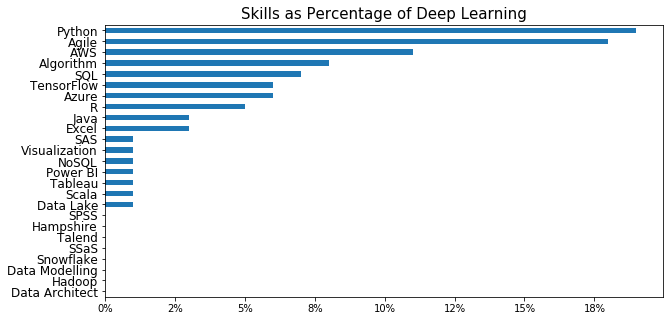

In [36]:
# Skill requirements for deep learning
skill_requirements("deep learning","Skills as Percentage of Deep Learning")

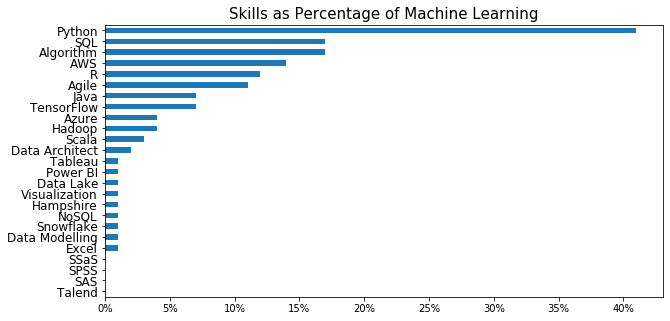

In [38]:
# Skill requirements for machine learning
skill_requirements("machine learning","Skills as Percentage of Machine Learning")

## Degree requirements

In [46]:
it_skill =data_text['Description'].values

In [48]:
# Define regex pattern and seach for bachelor
pattern = re.compile("(?i)\WBachelor?'?s?\W")
pattern2 = re.compile('(?i)\WB.?R\W')
count = 0
for t in it_skill:
    if pattern.search(t):
        count +=1
    elif pattern2.search(t):
        count +=1
degree = {"Bachelor": count}

In [42]:
# Define regex pattern and seach for Master 
pattern = re.compile("(?i)\WMasters?'?s?\W")
pattern2 = re.compile('(?i)\WM.?S\W')
count = 0
for t in it_skill:
    if pattern.search(t):
        count +=1
    elif pattern2.search(t):
        count +=1
degree.update({"Master":count})

In [43]:
# Define regex pattern and seach for PHD
pattern = re.compile("(?i)\WPhd?'?s?\W")
pattern2 = re.compile('(?i)\WP?D\W')
count = 0
for t in it_skill:
    if pattern.search(t):
        count +=1
    elif pattern2.search(t):
        count +=1
degree.update({"PhD":count})

In [44]:
degree = pd.DataFrame.from_dict(degree,orient='index',
                       columns=[ 'count'])
degree['ptg'] = degree['count']/len(it_skill)

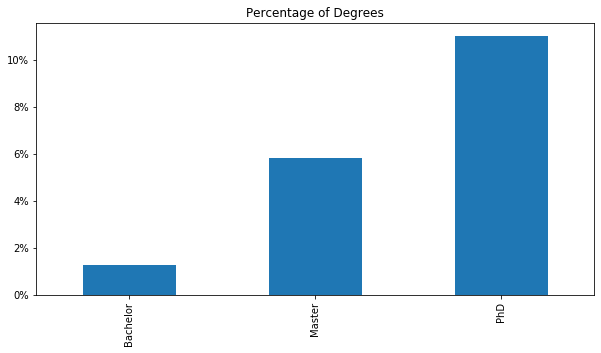

In [45]:
ax =degree['ptg'].plot(kind = "bar", figsize =(10,5))
ax.set_title('Percentage of Degrees')
ax.set_xticklabels(degree.index)
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.show()